In [1]:
import numpy as np
import pandas as pd

In [2]:
full_data = pd.read_csv('E:/May 30 DecisionTree/titanic_data.csv')

In [3]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
full_data.shape

(891, 12)

In [5]:
full_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)

In [7]:
full_data.drop('Name', axis = 1, inplace=True)

In [8]:
full_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [9]:
full_data['Age'] = full_data['Age'].fillna(np.mean(full_data['Age']))

In [10]:
full_data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [11]:
full_data['Age'].isnull().sum()

0

In [12]:
full_data['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
C103           1
B38            1
B79            1
E40            1
F G63          1
Name: Cabin, Length: 147, dtype: int64

In [13]:
full_data.drop('Cabin', axis=1, inplace=True)

In [14]:
full_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
full_data['Embarked'] = full_data['Embarked'].fillna('S')

In [16]:
full_data.drop('Ticket', axis=1, inplace=True)

In [17]:
full_data.drop('PassengerId', axis=1, inplace=True)

In [18]:
full_data.drop('SibSp', axis=1, inplace=True)

In [19]:
X = full_data[['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']]
Y = full_data[['Survived']]

In [20]:
full_data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [21]:
features = pd.get_dummies(features_raw)

In [22]:
features = features.fillna(0.0)
display(features.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

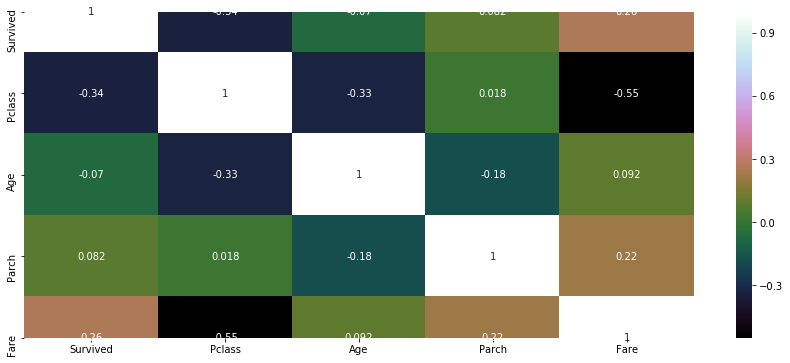

In [24]:
corrmat = full_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,6))
sns.heatmap(full_data.corr(),cmap = 'cubehelix', annot=True)

In [25]:
full_data.corr()

,Survived,Pclass,Age,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.179191,0.091566
Parch,0.081629,0.018443,-0.179191,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.216225,1.000000


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, make_scorer
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [30]:
print('The Training F1 Score is', f1_score(y_train_pred, Y_train))
print('The Testing F1 Score is', f1_score(y_test_pred, Y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.7571428571428571


In [31]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [32]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [33]:
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

In [34]:
scorer = make_scorer(f1_score)

In [35]:
grid_obj = GridSearchCV(model, parameters, scoring=None)

In [36]:
grid_fit = grid_obj.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [37]:
best_model = grid_obj.best_estimator_

In [38]:
best_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
best_train_predictions = best_model.predict(X_train)
best_test_predictions = best_model.predict(X_test)

In [40]:
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

The training F1 Score is 0.7999999999999999
The testing F1 Score is 0.7943262411347517


In [41]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, best_test_predictions)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8379888268156425


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_test_pred)

In [43]:
cm

array([[92, 13],
       [21, 53]], dtype=int64)

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [45]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [47]:
rf_train_pred = classifier.predict(X_train)
rf_test_pred = classifier.predict(X_test)

In [48]:
print('The training F1 Score is', f1_score(rf_train_pred, Y_train))
print('The testing F1 Score is', f1_score(rf_test_pred, Y_test))

The training F1 Score is 0.979047619047619
The testing F1 Score is 0.723076923076923


In [49]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [50]:
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist)

In [51]:
random_search.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=

In [52]:
rf_preds = random_search.best_estimator_.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, rf_preds)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.7988826815642458


###### In this Decision Tree, implemented Cross validation techniques to make sure which of these is good. 
###### The data set i choisen is small data set. the Accuracy and meteric is based on the data we are using.
###### If we closely observe the metrics, F1 accuracy and confusion matrix. a slight difference in the scores is seen among these along with DecisionTree - GridSreachCV over comes the fitting problem test accuracy - 0.83 which is good score at this point.